In [2]:
import copy
import pylab
import random
import numpy as np
from environment import Env
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
EPISODES=1000

In [4]:
class DeepSARSAgent:
    def __init__(self):
        self.action_space=[0,1,2,3,4]
        self.action_size=len(self.action_space)
        self.state_size=15
        self.discount_factor=0.99
        self.learning_rate=0.001
        self.epsilon=1.
        self.epsilon_decay=0.999
        self.epsion_min=0.01
        self.model=self.build_model()
        
    def build_model(self):
        model=Sequential()
        model.add(Dense(30,input_dim=self.state_size,activation='relu'))
        model.add(Dense(30,activation='relu'))
        model.add(Dense(self.action_size,activation='linear'))
        model.summary()
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        return model
    
    def get_action(self,state):
        if np.random.rand()<self.epsilon:
            return random.randrange(self.action_size)
        else:
            state=np.float32(state)
            q_values=self.model.predict(state)
            return np.argmax(q_values[0])
    def train_model(self,state,action,reward,next_state,next_action,done):
        if self.epsilon>self.epsion_min:
            self.epsilon*=self.epsilon_decay
        state=np.float32(state)
        next_state=np.float32(next_state)
        target=self.model.predict(state)[0]
        if done:
            target[action]=reward
        else:
            target[action]=(reward+self.discount_factor*
                           self.model.predict(next_state)[0][next_action])
        target=np.reshape(target,[1,5])
        
        self.model.fit(state,target,epochs=1,verbose=0)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 1,565
Trainable params: 1,565
Non-trainable params: 0
_________________________________________________________________
episode: 0   score: -25 global_step 197   epsilon: 0.8211096960588341
episode: 1   score: -5 global_step 280   epsilon: 0.7556778685553796
episode: 2   score: -13 global_step 348   epsilon: 0.7059759437435444
episode: 3   score: 0 global_step 366   epsilon: 0.6933758171534341
episode: 4   score: 0 global_step 385   epsilon: 0.680319574690566
episode: 5   score: -2 global_step 397

episode: 106   score: 1 global_step 1859   epsilon: 0.15568350913099022
episode: 107   score: 1 global_step 1873   epsilon: 0.15351805068921792
episode: 108   score: 0 global_step 1885   epsilon: 0.1516859325741916
episode: 109   score: -1 global_step 1904   epsilon: 0.14882969175225835
episode: 110   score: 1 global_step 1916   epsilon: 0.1470535255419077
episode: 111   score: 1 global_step 1927   epsilon: 0.1454440004894796
episode: 112   score: 1 global_step 1940   epsilon: 0.1435645316219759
episode: 113   score: 1 global_step 1958   epsilon: 0.14100221871554078
episode: 114   score: 1 global_step 1971   epsilon: 0.13918014781929933
episode: 115   score: 1 global_step 1983   epsilon: 0.13751914138437535
episode: 116   score: 1 global_step 1995   epsilon: 0.1358779577648463
episode: 117   score: 1 global_step 2007   epsilon: 0.134256360390882
episode: 118   score: 1 global_step 2019   epsilon: 0.13265411551592862
episode: 119   score: 1 global_step 2036   epsilon: 0.1304169466219669

TclError: invalid command name ".!canvas"

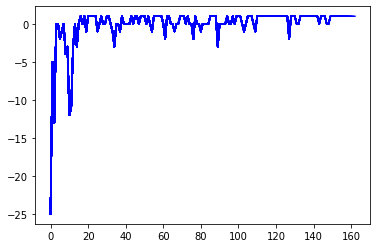

In [5]:
env=Env()
agent=DeepSARSAgent()
global_step=0
scores,episodes=[],[]

for e in range(EPISODES):
    done=False
    score=0
    state=env.reset()
    state=np.reshape(state,[1,15])
    while not done:
        global_step+=1
        action=agent.get_action(state)
        next_state,reward,done=env.step(action)
        next_state=np.reshape(next_state,[1,15])
        next_action=agent.get_action(next_state)
        agent.train_model(state,action,reward,next_state,next_action,done)
        state=next_state
        score+=reward
        state-copy.deepcopy(next_state)
    if done:
        scores.append(score)
        episodes.append(e)
        pylab.plot(episodes, scores, 'b')
        print("episode:", e, "  score:", score, "global_step",
                      global_step, "  epsilon:", agent.epsilon)